In [1]:
from datasets import load_dataset
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df=df.explode('job_skills')

In [9]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}"
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


Text(0, 0.5, 'Number of Jobs in US')

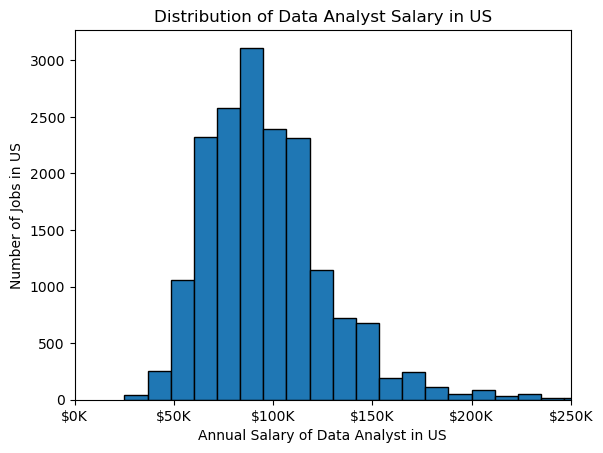

In [16]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Distribution of Data Analyst Salary in US')
plt.xlabel('Annual Salary of Data Analyst in US')
plt.ylabel('Number of Jobs in US')